In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import joblib
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# set random seed for reproducibility
random.seed(47)

# LOAD DATA

In [2]:
labels = pd.read_csv("DataFrames/LABELS.csv")
labels = labels.drop("Unnamed: 0", axis=1)
labels

,Trial Num,Start Frame,Stop Frame,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16
1,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
4,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17,S1,RM16
...,...,...,...,...,...,...,...,...,...,...,...,...
436,46.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9
437,47.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9
438,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9
439,49.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9


In [3]:
discrete_df = pd.read_csv("DataFrames/DISCRETE_DF.csv")
discrete_df

,Unnamed: 0,nose_vx_p5,nose_vx_p25,nose_vx_p50,nose_vx_p75,nose_vx_p95,nose_vy_p5,nose_vy_p25,nose_vy_p50,nose_vy_p75,...,y_rob_p5,y_rob_p25,y_rob_p50,y_rob_p75,y_rob_p95,z_rob_p5,z_rob_p25,z_rob_p50,z_rob_p75,z_rob_p95
0,0,-0.035476,-0.014832,0.001239,0.006294,0.022321,-0.014059,-0.006005,-0.001494,0.009793,...,0.166572,0.168006,0.168394,0.168803,0.169898,0.393390,0.396053,0.397078,0.397685,0.399236
1,1,-0.045250,-0.011618,0.007241,0.021920,0.039469,-0.032908,-0.018692,-0.004400,0.016925,...,0.118931,0.119262,0.119440,0.119729,0.120152,0.447020,0.448481,0.448987,0.449361,0.449665
2,2,-0.036294,-0.016094,-0.001998,0.015953,0.030454,-0.028781,-0.007606,0.012587,0.026449,...,0.119397,0.120237,0.120485,0.120695,0.121028,0.448677,0.450247,0.450663,0.450932,0.451604
3,3,-0.039694,-0.012562,0.002324,0.027734,0.067174,-0.038574,-0.023681,-0.008450,0.024671,...,0.118274,0.120114,0.120551,0.121043,0.121983,0.444181,0.448774,0.450143,0.451004,0.452016
4,4,-0.051618,-0.002211,0.024441,0.057781,0.084840,-0.057600,-0.041750,-0.021137,0.005952,...,0.138715,0.146647,0.157845,0.159046,0.160538,0.352072,0.354211,0.355657,0.376376,0.384446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.057490,0.062577,0.118079,0.120300,0.121256,0.400102,0.409177,0.449528,0.451257,0.457321
380,380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.063171,0.063710,0.064096,0.128646,0.132145,0.435032,0.449614,0.456722,0.457518,0.458682
381,381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.139492,0.140109,0.140662,0.141963,0.180167,0.397403,0.399714,0.400644,0.435467,0.621981
382,382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.133053,0.134456,0.134922,0.135403,0.155573,0.574477,0.612024,0.613420,0.613976,0.615383


In [4]:
discrete_df_extended = pd.read_csv("DataFrames/DISCRETE_DF_extended.csv")
discrete_df_extended

,Unnamed: 0,nose_vx_p5,nose_vx_p25,nose_vx_p50,nose_vx_p75,nose_vx_p95,nose_vy_p5,nose_vy_p25,nose_vy_p50,nose_vy_p75,...,y_rob_p5,y_rob_p25,y_rob_p50,y_rob_p75,y_rob_p95,z_rob_p5,z_rob_p25,z_rob_p50,z_rob_p75,z_rob_p95
0,0,-0.007887,-0.001361,0.000423,0.001995,0.008748,-0.008450,-0.003387,-0.000387,0.002439,...,0.116913,0.136216,0.168268,0.168765,0.169720,0.394498,0.396970,0.397752,0.410795,0.448962
1,1,-0.016553,-0.002183,-0.000336,0.002504,0.021144,-0.016460,-0.004492,-0.000055,0.003817,...,0.119107,0.119935,0.156415,0.157206,0.161510,0.384122,0.386378,0.387804,0.447296,0.449612
2,2,-0.019709,-0.001825,0.000349,0.003092,0.015114,-0.011166,-0.003587,-0.000745,0.002158,...,0.119384,0.120325,0.120532,0.120838,0.121757,0.447108,0.449957,0.450557,0.451011,0.451742
3,3,-0.024281,-0.002406,0.000448,0.002922,0.012956,-0.015800,-0.004344,-0.000039,0.003062,...,0.119037,0.120158,0.120517,0.120906,0.122114,0.445222,0.449603,0.450496,0.450999,0.451988
4,4,-0.012897,-0.001092,0.000723,0.003674,0.035301,-0.033995,-0.005891,-0.002075,0.001226,...,0.116736,0.119651,0.119880,0.138843,0.159017,0.354402,0.386744,0.447999,0.448625,0.449218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.062509,0.063787,0.064083,0.066834,0.119994,0.409666,0.443675,0.456518,0.457465,0.458240
380,380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.063745,0.139279,0.141305,0.145522,0.153175,0.395103,0.401436,0.418618,0.429420,0.457234
381,381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.134250,0.134792,0.135139,0.138745,0.157438,0.399996,0.589602,0.613193,0.613976,0.632069
382,382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.134636,0.233363,0.234264,0.234667,0.235493,0.473973,0.474918,0.475529,0.476562,0.613805


# REMOVE UN-NECESSARY COLUMNS

In [5]:
# Match and add labels 

# Remove unmatched labels (manual)
new_labels = labels.loc[(labels['Rat']!="RM13") | (labels["Session"]!="S3") | (labels['Date']!=20)]

# Remove non-class columns
new_labels.reset_index(inplace=True, drop=True)
new_labels

,Trial Num,Start Frame,Stop Frame,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16
1,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
4,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17,S1,RM16
...,...,...,...,...,...,...,...,...,...,...,...,...
379,46.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9
380,47.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9
381,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9
382,49.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9


# Preprocess Data

In [7]:
def pre(discrete_df):
    # rm 50 percentile for xyz_rob and sensor because it is just the handle position or does not give us any new information
    for col in discrete_df.columns:
        if (col == "Unnamed: 0") or ("_rob_p50" in col) or ("_sensor_p50" in col):
            discrete_df = discrete_df.drop(col, axis=1)
    
    # standardize
    discrete_df2 = StandardScaler().fit_transform(discrete_df)
    discrete_df = pd.DataFrame(discrete_df2, columns = discrete_df.columns)

    return discrete_df

In [41]:
# rm 50 percentile for xyz_rob and sensor because it is just the handle position or does not give us any new information
#for col in discrete_df.columns:
#    if (col == "Unnamed: 0") or ("_rob_p50" in col) or ("_sensor_p50" in col):
#        discrete_df = discrete_df.drop(col, axis=1)
        
#discrete_df

In [42]:
## Standardizing the features
"""
Each feature of your data should be normally distributed 
such that it will scale the distribution to a mean of zero and a standard deviation of one.
"""
#discrete_df2 = StandardScaler().fit_transform(discrete_df)
#discrete_df = pd.DataFrame(discrete_df2, columns = discrete_df.columns)
#discrete_df

'\nEach feature of your data should be normally distributed \nsuch that it will scale the distribution to a mean of zero and a standard deviation of one.\n'

In [18]:
df_extended_labels = pd.concat([discrete_df_extended, new_labels], axis=1)
df_extended_labels['Num Reaches']

0      0.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
379    0.0
380    0.0
381    0.0
382    0.0
383    0.0
Name: Num Reaches, Length: 384, dtype: float64

# DEFINE PCA FUCNTION

In [37]:
def doPCA(df, n, concat = True):
    """
    Performs PCA on df. 
    Returns dataframe with PCA columns and pca object. """
    pca = PCA(n_components=n)
    components = pca.fit_transform(df)
    PCA_col_names = ["PC" + str(x) for x in range(1, pca.n_components_+1)]
    pca_df = pd.DataFrame(components, columns=PCA_col_names)
    if concat:
        pca_df = pd.concat([pca_df, new_labels], axis=1)
    
    return pca_df, pca

### DO PCA

In [10]:
# do pca on all features
data, model = doPCA(pre(discrete_df), None)
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Stop Frame,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat
0,-14.556057,-5.058066,-0.571175,-2.920855,-8.386121,7.504464,6.444057,-7.264459,-0.418094,2.485311,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16
1,4.707227,-0.936269,-1.807046,-7.266202,-1.458812,9.150883,1.554896,-8.545136,-1.836478,9.369906,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16
2,0.419825,6.866147,-2.149633,-8.179890,0.926190,0.853460,5.812632,2.326269,3.547956,-3.530746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
3,-7.526640,-7.069065,-0.442580,-0.641086,-2.679941,4.926130,12.554484,-4.487274,-1.430359,-2.942291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
4,-8.290526,-9.224430,-1.762426,1.049623,-4.574921,5.671087,5.711493,-4.813216,-0.805555,0.750168,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17,S1,RM16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,-24.890528,10.101036,-0.916601,-0.501549,3.241741,-2.938186,-2.004111,0.363024,-0.105066,0.833075,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9
380,-24.934423,10.156373,-0.958768,-0.529223,3.247984,-2.980272,-2.010161,0.357387,-0.033360,0.873913,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9
381,-25.015489,10.254962,-1.042526,-0.601094,3.285232,-3.065936,-2.042245,0.380357,0.102797,1.011708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9
382,-24.948585,10.232479,-0.981323,-0.522696,3.292314,-3.069122,-1.883164,0.235879,0.095495,0.842896,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9


In [11]:
data_extended, model_extended = doPCA(pre(discrete_df_extended), None)
data_extended

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Stop Frame,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat
0,-16.112208,-10.821105,-2.899471,4.954374,6.501677,1.436726,7.510820,-1.444535,-1.811608,0.826400,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16
1,-11.376868,-9.869008,-5.894768,-1.137910,4.675638,-8.657370,7.341026,-5.118645,-1.816654,1.264443,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16
2,-7.797103,-1.044952,-4.461393,-4.446190,-3.271765,2.617972,0.305643,5.167860,0.131906,-0.750845,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
3,-8.000412,-11.369783,-0.517317,4.644007,2.296892,6.517055,6.050995,2.719190,1.598218,2.291740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
4,-11.804895,-12.132714,-3.083092,3.569628,4.065478,1.354075,7.263697,-0.359086,-0.462053,0.984642,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17,S1,RM16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,-26.025277,11.100170,4.944824,-2.267007,2.136077,-1.111861,-1.200311,-0.888144,0.590156,-0.238568,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9
380,-26.116015,11.236775,4.928527,-2.360668,2.141292,-1.182418,-1.278835,-0.871556,0.454799,-0.257369,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9
381,-26.080733,11.229083,4.936917,-2.462996,2.212533,-1.090896,-1.285079,-0.956094,0.536457,-0.364188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9
382,-26.116267,11.322882,4.935405,-2.539738,2.242934,-1.114456,-1.322463,-0.905421,0.511843,-0.426995,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9


In [13]:
# Dump PCA for null model

null_fname = 'null_PCA.sav'
joblib.dump(model_extended, null_fname)

['null_PCA.sav']

# DO PCA ON DISCRETE DATA

In [66]:
def plotPCAROC(data, y_name, maximum):
    """
    Produces plots of # of given PCs to a model 
    vs the model's training, validation, and test accuracies.
    Saves plots to plots folder.
    """
    # define data holding lists
    all_chance = []
    all_trainAcc = []
    all_valAcc = []
    all_ROC = []
    all_ROCAUC = []
    min = 3
    max = maximum
    NumPCsArray = range(min, max)


    # for each # of PCs 1, 2...n to use
    for n in NumPCsArray:
        # get y
        y = data[y_name]
        
        # select first n PCs
        df = data.iloc[: , :n]
        print(f"Num PCs: {n}")

        # append labels
        df = pd.concat([df, y], axis=1)
        
        # make models
        model = RandomForestClassifier(random_state=0) # create new model
        model2 = RandomForestClassifier(n_estimators=150, random_state=0) # create new model

        # do classification
        chance_score, train_score, val_score, roc, roc_auc = classifier(df, y_name).main_PCvROC(model, model2)
        all_chance.append(chance_score)
        all_trainAcc.append(train_score)
        all_valAcc.append(val_score)
        all_ROC.append(roc)
        all_ROCAUC.append(roc_auc)

    # plot
    fig = plt.figure() 
    plt.ylim([0.4, 1.0]) # y axis range fixed to be 0.40 to 1.00
    plt.title(f"PCs V Accuracy: {y_name}")
    plt.plot(NumPCsArray, all_chance, label="chance")
    plt.plot(NumPCsArray, all_trainAcc, label="train")
    plt.plot(NumPCsArray, all_valAcc, label="val")
    plt.legend()
    plt.savefig(f"Plots/PCvAcc: {y_name}")

    fig = plt.figure()
    plt.title(f"PCs V ROC: {y_name}")
    for i in range(0, len(all_ROC), 10):
        fpr, tpr = all_ROC[i]
        plt.plot(fpr, tpr, label=i+min)
    # plot last one
    fpr, tpr = all_ROC[-1]
    plt.plot(fpr, tpr, label=maximum)
    plt.legend()
    plt.savefig(f"Plots/PCvROC: {y_name}")

    fig = plt.figure()
    plt.ylim([0.7, 1.0]) # y axis range to be 0.70-1.00
    plt.title(f"PCs V ROC AUC: {y_name}")
    plt.plot(NumPCsArray, all_ROCAUC)
    plt.savefig(f"Plots/PCvROCAUC: {y_name}")

In [47]:
#data = pd.read_csv("DataFrames\PCA.csv")
#data = data.drop('Unnamed: 0', axis=1)
#data

# Separate Data based on Class

In [20]:
# not null data
notNull_data = df_extended_labels[df_extended_labels['Trial Type']==0] # 1 if null, 0 if real trial
display(notNull_data)


# single v multiple datasets
singleReach_data = notNull_data[notNull_data['Num Reaches'] == 0] # 0 if <=1, 1 if > 1 reaches
multipleReach_data = notNull_data[notNull_data['Num Reaches'] == 1]
display(singleReach_data)
display(multipleReach_data)

## l v r dataset
singleReach_data2 = singleReach_data[singleReach_data['Which Hand']!=3] # rm bi
singleReach_data2 = singleReach_data2.replace({2:0, 1:0, 5:1}) # combine lr (2) with l (1) to 0. change r (5) to 1
#pd.unique(singleReach_data2['Nonbin Which Hand']) # 1 2 is l, 3 is bi, 5 is r
display(singleReach_data2)

# need to excludes bin and combine lr 
rightHand_data = singleReach_data[singleReach_data["Which Hand"] == 5]  # 5 for right, 1 for left
leftHand_data = singleReach_data[singleReach_data["Which Hand"] == 1]
display(rightHand_data)
display(leftHand_data)

,Unnamed: 0,nose_vx_p5,nose_vx_p25,nose_vx_p50,nose_vx_p75,nose_vx_p95,nose_vy_p5,nose_vy_p25,nose_vy_p50,nose_vy_p75,...,Stop Frame,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat
0,0,-0.007887,-0.001361,0.000423,0.001995,0.008748,-0.008450,-0.003387,-0.000387,0.002439,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16
1,1,-0.016553,-0.002183,-0.000336,0.002504,0.021144,-0.016460,-0.004492,-0.000055,0.003817,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16
2,2,-0.019709,-0.001825,0.000349,0.003092,0.015114,-0.011166,-0.003587,-0.000745,0.002158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
3,3,-0.024281,-0.002406,0.000448,0.002922,0.012956,-0.015800,-0.004344,-0.000039,0.003062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
4,4,-0.012897,-0.001092,0.000723,0.003674,0.035301,-0.033995,-0.005891,-0.002075,0.001226,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17,S1,RM16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,371,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9
375,375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19,S3,RM9
376,376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9
378,378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19,S3,RM9


,Unnamed: 0,nose_vx_p5,nose_vx_p25,nose_vx_p50,nose_vx_p75,nose_vx_p95,nose_vy_p5,nose_vy_p25,nose_vy_p50,nose_vy_p75,...,Stop Frame,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat
0,0,-0.007887,-0.001361,0.000423,0.001995,0.008748,-0.008450,-0.003387,-0.000387,0.002439,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16
1,1,-0.016553,-0.002183,-0.000336,0.002504,0.021144,-0.016460,-0.004492,-0.000055,0.003817,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16
2,2,-0.019709,-0.001825,0.000349,0.003092,0.015114,-0.011166,-0.003587,-0.000745,0.002158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
3,3,-0.024281,-0.002406,0.000448,0.002922,0.012956,-0.015800,-0.004344,-0.000039,0.003062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
7,7,-0.081649,-0.019002,-0.004503,0.008215,0.031997,-0.047603,-0.006030,0.001317,0.016565,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17,S1,RM16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9
368,368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9
371,371,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9
376,376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9


,Unnamed: 0,nose_vx_p5,nose_vx_p25,nose_vx_p50,nose_vx_p75,nose_vx_p95,nose_vy_p5,nose_vy_p25,nose_vy_p50,nose_vy_p75,...,Stop Frame,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat
4,4,-0.012897,-0.001092,0.000723,0.003674,0.035301,-0.033995,-0.005891,-0.002075,0.001226,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17,S1,RM16
5,5,-0.052890,-0.018980,-0.004330,0.028228,0.066923,-0.034616,-0.006644,-0.000873,0.006848,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,17,S1,RM16
6,6,-0.097172,-0.015138,0.000129,0.010317,0.058345,-0.111442,-0.011392,-0.000252,0.011723,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,17,S1,RM16
11,11,-0.060819,-0.001286,0.001803,0.004647,0.066535,-0.042656,-0.008374,-0.001708,0.003078,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,17,S1,RM16
12,12,-0.072059,-0.005813,0.000429,0.005849,0.096322,-0.082556,-0.005221,0.000953,0.016679,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,17,S1,RM16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19,S3,RM9
347,347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,19,S3,RM9
354,354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,19,S3,RM9
375,375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19,S3,RM9


,Unnamed: 0,nose_vx_p5,nose_vx_p25,nose_vx_p50,nose_vx_p75,nose_vx_p95,nose_vy_p5,nose_vy_p25,nose_vy_p50,nose_vy_p75,...,Stop Frame,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat
0,0,-0.007887,-0.001361,0.000423,0.001995,0.008748,-0.008450,-0.003387,-0.000387,0.002439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
1,0,-0.016553,-0.002183,-0.000336,0.002504,0.021144,-0.016460,-0.004492,-0.000055,0.003817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
2,0,-0.019709,-0.001825,0.000349,0.003092,0.015114,-0.011166,-0.003587,-0.000745,0.002158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
3,3,-0.024281,-0.002406,0.000448,0.002922,0.012956,-0.015800,-0.004344,-0.000039,0.003062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
7,7,-0.081649,-0.019002,-0.004503,0.008215,0.031997,-0.047603,-0.006030,0.001317,0.016565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9
368,368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9
371,371,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9
376,376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9


,Unnamed: 0,nose_vx_p5,nose_vx_p25,nose_vx_p50,nose_vx_p75,nose_vx_p95,nose_vy_p5,nose_vy_p25,nose_vy_p50,nose_vy_p75,...,Stop Frame,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat


,Unnamed: 0,nose_vx_p5,nose_vx_p25,nose_vx_p50,nose_vx_p75,nose_vx_p95,nose_vy_p5,nose_vy_p25,nose_vy_p50,nose_vy_p75,...,Stop Frame,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat
7,7,-0.081649,-0.019002,-0.004503,0.008215,0.031997,-0.047603,-0.006030,0.001317,0.016565,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17,S1,RM16
10,10,-0.087532,-0.011187,0.000545,0.012729,0.085726,-0.134526,-0.020624,-0.000556,0.010334,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,17,S1,RM16
13,13,-0.011326,-0.003544,-0.001077,0.004085,0.015073,-0.016698,-0.003712,-0.000225,0.003282,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,17,S1,RM16
16,16,-0.011530,-0.002356,0.000860,0.004043,0.030859,-0.034361,-0.005599,0.000460,0.005277,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,17,S1,RM16
19,19,-0.006249,-0.002691,-0.000822,0.001803,0.004993,-0.010352,-0.003263,0.001694,0.005707,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,17,S1,RM16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18,S4,RM11
321,321,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18,S4,RM11
322,322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18,S4,RM11
353,353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9


In [54]:
import pdb
# EXTENDED not null data
notNull_data_extended = df_extended_labels[df_extended_labels['Trial Type']==0] # 1 if null, 0 if real trial
display(notNull_data_extended)


# single v multiple datasets
singleReach_data_extended = notNull_data_extended[notNull_data_extended['Num Reaches'] == 0] # 0 if <=1, 1 if > 1 reaches
#multipleReach_data = notNull_data[notNull_data['Num Reaches'] == 1]
display(singleReach_data_extended)
#display(multipleReach_data)

## l v r dataset
singleReach_data2_extended = singleReach_data_extended[singleReach_data_extended['Which Hand']!=3] # rm bi
singleReach_data2_extended = singleReach_data2_extended.replace({2:0, 1:0, 5:1}) # combine lr (2) with l (1) to 0. change r (5) to 1
#pd.unique(singleReach_data2['Nonbin Which Hand']) # 1 2 is l, 3 is bi, 5 is r
display(singleReach_data2_extended)


data_extended, model_null_extended = doPCA(pre(discrete_df_extended), None)

null_fname = 'null_PCA.sav'
joblib.dump(model_null_extended, null_fname)

singleReach_data_extended.drop(labels.columns, inplace=True, axis=1)

data_extended_number, model_number_extended = doPCA(pre(singleReach_data_extended), None, concat=True)


num_fname = 'num_reach_PCA.sav'
joblib.dump(model_number_extended, num_fname)

singleReach_data2_extended.drop(labels.columns, inplace=True, axis=1)
data_extended_hand, model_hand_extended = doPCA(pre(singleReach_data2_extended), None, concat=True)

hand_fname = 'hand_PCA.sav'
joblib.dump(model_hand_extended, hand_fname)

,Unnamed: 0,nose_vx_p5,nose_vx_p25,nose_vx_p50,nose_vx_p75,nose_vx_p95,nose_vy_p5,nose_vy_p25,nose_vy_p50,nose_vy_p75,...,Stop Frame,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat
0,0,-0.007887,-0.001361,0.000423,0.001995,0.008748,-0.008450,-0.003387,-0.000387,0.002439,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16
1,1,-0.016553,-0.002183,-0.000336,0.002504,0.021144,-0.016460,-0.004492,-0.000055,0.003817,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16
2,2,-0.019709,-0.001825,0.000349,0.003092,0.015114,-0.011166,-0.003587,-0.000745,0.002158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
3,3,-0.024281,-0.002406,0.000448,0.002922,0.012956,-0.015800,-0.004344,-0.000039,0.003062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
4,4,-0.012897,-0.001092,0.000723,0.003674,0.035301,-0.033995,-0.005891,-0.002075,0.001226,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17,S1,RM16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,371,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9
375,375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19,S3,RM9
376,376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9
378,378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19,S3,RM9


,Unnamed: 0,nose_vx_p5,nose_vx_p25,nose_vx_p50,nose_vx_p75,nose_vx_p95,nose_vy_p5,nose_vy_p25,nose_vy_p50,nose_vy_p75,...,Stop Frame,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat
0,0,-0.007887,-0.001361,0.000423,0.001995,0.008748,-0.008450,-0.003387,-0.000387,0.002439,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16
1,1,-0.016553,-0.002183,-0.000336,0.002504,0.021144,-0.016460,-0.004492,-0.000055,0.003817,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16
2,2,-0.019709,-0.001825,0.000349,0.003092,0.015114,-0.011166,-0.003587,-0.000745,0.002158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
3,3,-0.024281,-0.002406,0.000448,0.002922,0.012956,-0.015800,-0.004344,-0.000039,0.003062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
7,7,-0.081649,-0.019002,-0.004503,0.008215,0.031997,-0.047603,-0.006030,0.001317,0.016565,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17,S1,RM16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9
368,368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9
371,371,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9
376,376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9


,Unnamed: 0,nose_vx_p5,nose_vx_p25,nose_vx_p50,nose_vx_p75,nose_vx_p95,nose_vy_p5,nose_vy_p25,nose_vy_p50,nose_vy_p75,...,Stop Frame,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat
0,0,-0.007887,-0.001361,0.000423,0.001995,0.008748,-0.008450,-0.003387,-0.000387,0.002439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
1,0,-0.016553,-0.002183,-0.000336,0.002504,0.021144,-0.016460,-0.004492,-0.000055,0.003817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
2,0,-0.019709,-0.001825,0.000349,0.003092,0.015114,-0.011166,-0.003587,-0.000745,0.002158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
3,3,-0.024281,-0.002406,0.000448,0.002922,0.012956,-0.015800,-0.004344,-0.000039,0.003062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
7,7,-0.081649,-0.019002,-0.004503,0.008215,0.031997,-0.047603,-0.006030,0.001317,0.016565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9
368,368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9
371,371,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9
376,376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9


C:\Users\bassp\anaconda3\envs\DLC-GPU\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


['hand_PCA.sav']

1.0    325
0.0    325
Name: Trial Type, dtype: int64


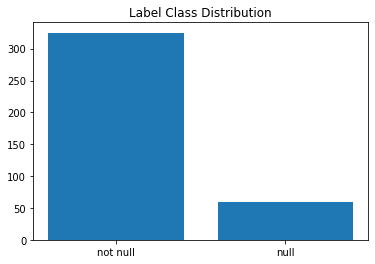

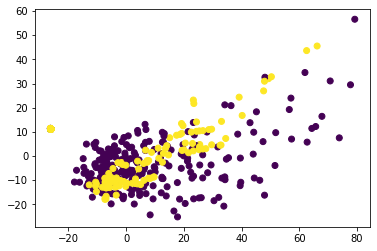

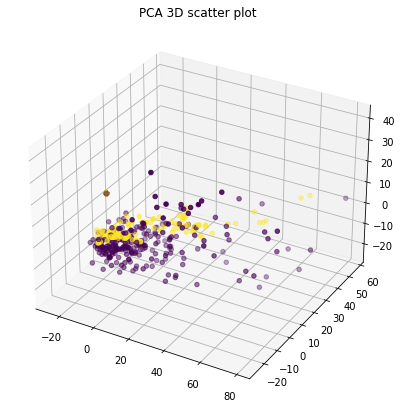

Avg cv accuracy: 0.503
Avg cv accuracy: 0.887
Avg cv accuracy: 0.86


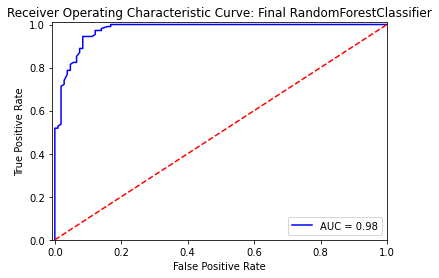

In [52]:
null_classifier = classifier(data_extended, 'Trial Type')
convert_dict = { 0:"not null", 1:"null"}
null_classifier.main(convert_dict, sn_k=False)

> <ipython-input-56-62fa6950c4f2>(37)adjust_class_imbalance()
     35         pipeline = Pipeline(steps=steps)
     36         pdb.set_trace()
---> 37         X_res, y_res = pipeline.fit_resample(X, y)
     38         return X_res, y_res
     39 

ipdb> c
1.0    87
0.0    87
Name: Num Reaches, dtype: int64


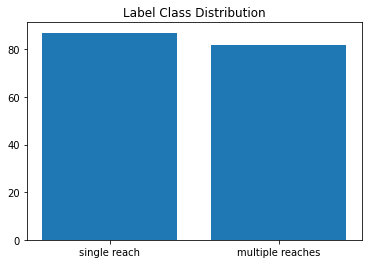

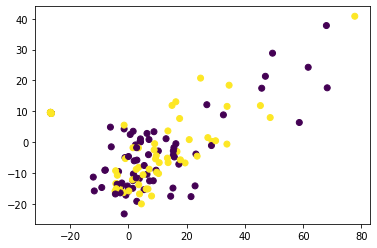

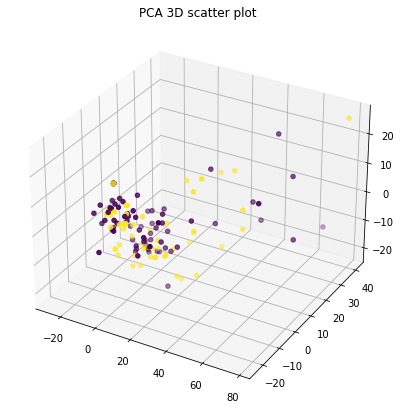

Avg cv accuracy: 0.457
Avg cv accuracy: 0.457
Avg cv accuracy: 0.623


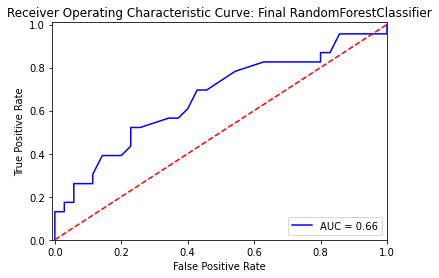

In [58]:
data_extended_number = data_extended_number[data_extended_number['PC1'].notna()]
number_classifier = classifier(data_extended_number, 'Num Reaches')

convert_dict = { 0:"single reach", 1:"multiple reaches"}
number_classifier.main(convert_dict, sn_k=False)

> <ipython-input-56-62fa6950c4f2>(37)adjust_class_imbalance()
     35         pipeline = Pipeline(steps=steps)
     36         pdb.set_trace()
---> 37         X_res, y_res = pipeline.fit_resample(X, y)
     38         return X_res, y_res
     39 

ipdb> c
1.0    113
0.0    113
Name: Which Hand, dtype: int64


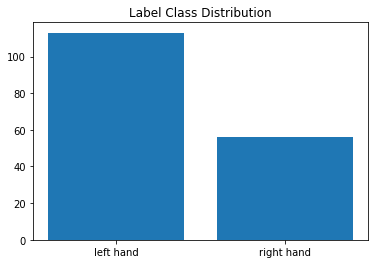

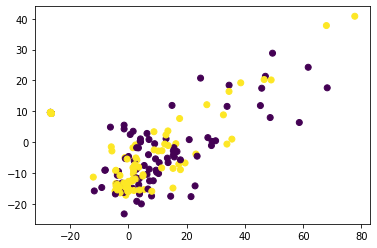

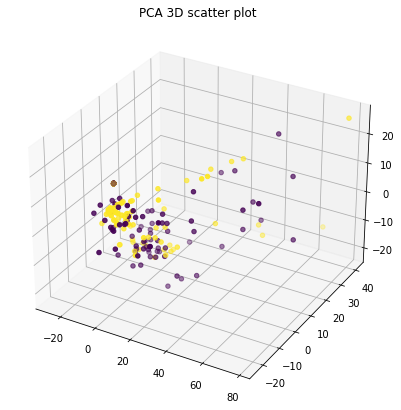

Avg cv accuracy: 0.424
Avg cv accuracy: 0.662
Avg cv accuracy: 0.653


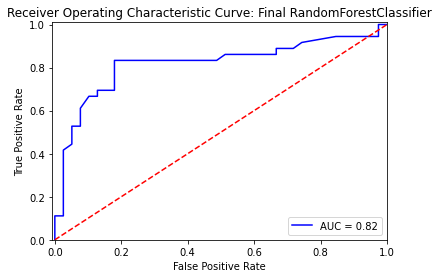

In [60]:
data_extended_hand = data_extended_hand[data_extended_hand['PC1'].notna()]
hand_classifier = classifier(data_extended_hand, 'Which Hand')
convert_dict = { 0:"left hand", 1:"right hand"}
hand_classifier.main(convert_dict, sn_k=False)

In [56]:
class classifier:
    def __init__(self, data, y_name):
        self.data = data
        self.y_name = y_name
        
    ### Define X and y from df ###
    def filter_y(df, y_name):
        """
        Separates X and y in df
        df: Df
        y_name: str col name
        Returns X and y separted
        """
        new_df = df.copy()
        for col in new_df.columns:
            if (not "PC" in col) and (col!=y_name):
                new_df= new_df.drop([col], axis=1)
        X = new_df.drop([y_name], axis=1)
        y = new_df[y_name]#.to_frame()
        return new_df, X, y

    ### Adjust Class Imbalances ###

    def adjust_class_imbalance(X, y):
        """
        Adjusts for class imbalance.
            Object to over-sample the minority class(es) by picking samples at random with replacement.
            The dataset is transformed, first by oversampling the minority class, then undersampling the majority class.
        Returns: new samples
        References: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
        """
        oversampler = SMOTE(random_state=42)
        #undersampler = RandomUnderSampler(random_state=42)
        steps = [('o', oversampler)] #, ('u', undersampler)]
        pipeline = Pipeline(steps=steps)
        pdb.set_trace()
        X_res, y_res = pipeline.fit_resample(X, y)
        return X_res, y_res

    def plot_scatter(X, y):
        """
        Return Scatter Plot in 2D
        X: Df
        y: Series
        """
        # summarize class distribution
        counter = y.value_counts()
        print(counter)

        # scatter plot of examples by class label
        plt.figure()
        plt.scatter(X["PC1"].values, X["PC2"].values, c=y.values)
        plt.show()
        
    def plot_scatter_3D(X, y):
        """
        Return Scatter Plot
        X: Df
        y: Series
        """
        a = X["PC1"].values
        b = X["PC2"].values
        c = X["PC3"].values

        # Creating figure
        fig = plt.figure(figsize = (10, 7))
        ax = plt.axes(projection ="3d")

        # Creating plot
        ax.scatter3D(a, b, c, c=y.values)
        plt.title("PCA 3D scatter plot")

        # show plot
        plt.show()
        
    
    ### Visualize Class Balances ### 
    
    def plot_class_balance(y, convert_dict):
        counts = y.replace(convert_dict).value_counts()
        x_labels = list(convert_dict.values())
        plt.figure()
        plt.bar(x_labels, counts.values)
        plt.title("Label Class Distribution");

    ### Split ###
    
    def split(X, Y):
        # Split into training+validation and test set (33%)
        X_temp, X_test, Y_temp, Y_test = train_test_split(X, Y, test_size = 0.33, random_state=10) 

        # Split into training and validation set (33%)
        #X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size = 0.33, random_state=10) 

        #print(f" X_train size {X_train.shape} \n X_val size {X_val.shape}\n X_test size {X_test.shape}.")
        #return X_train, X_val, Y_train, Y_val, X_test, Y_test
        return X_temp, X_test, Y_temp, Y_test
        
    
    ### Determine Chance ###

    def find_chance(y):
        """ Shuffles y.
        Returns shuffed y"""
        y = y.copy()
        y = shuffle(y, random_state=42)
        return y.reset_index(drop=True)

    ### Tuning ### 

    # Depth of trees
    def tune_hyperparams(X_train, Y_train):
        # Tuning hyperparameters for RandomForestClassifier
        # may take a bit to run
        # reference https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

        # creat model
        model = RandomForestClassifier(random_state=0) 

        # define hyperparameter to tune
        max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]  # make smaller to reduce runtime if necessary

        # define cross validation grid search
        grid = dict(max_depth=max_depth)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
        grid_result = grid_search.fit(X_train, np.ravel(Y_train))

        # summarize results
        print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
        means = grid_result.cv_results_['mean_test_score']
        params = grid_result.cv_results_['params']

        # plot
        plt.plot([p['max_depth'] for p in params], means,marker='o', color='orange')
        plt.title("Random Forest Classifier: Max Depth of Trees vs Accuracy")
        plt.xlabel("n_estimators (Max Depth of Trees)")
        plt.ylabel("CV Accuracy");

        # define best n_estimators
        best_max_depth = grid_result.best_params_['max_depth']
        return best_max_depth

    def best_k_features(X_train, Y_train, n_estimators):
        # Visualize Accuracy vs Number of Features
        # may take a bit to run
        accuracies = []
        n = X_train.shape[1]+1 # num cols
        for k in np.arange(1, n): 
          selector = SelectKBest(score_func=f_classif, k=k)  # f_classif: ANOVA F-value between label/feature for classification tasks.
          z = selector.fit_transform(X_train, np.ravel(Y_train))  # temp new X
          filter = selector.get_support() # mask for selected features

          # create, fit, and score model on k features
          model = RandomForestClassifier(n_estimators=n_estimators, random_state=10)  # use best n_estimators from previous part
          model.fit(z, np.ravel(Y_train))
          scores = cross_val_score(model, z, np.ravel(Y_train), cv=3) # 3-fold cv to reduce time to run
          accuracies.append(np.mean(scores))

        # print best k
        a_dictionary = dict(zip(np.arange(1, n), accuracies))
        max_key = max(a_dictionary, key=a_dictionary.get)
        print(f"max accuracy {max(accuracies)} with k={max_key}.")

        # plot
        plt.figure()
        plt.plot(np.arange(1, n), accuracies, marker='v', color='green')
        plt.title("Random Forest Classifier: Number of Features vs Accuracy")
        plt.xlabel("k (# of most important features used)")
        plt.ylabel("CV Accuracy");
        plt.xticks(np.arange(1, n));
        plt.show()

        # define best k
        k = max_key
        return k
    
    def vis_feat_importance(X_train, Y_train):
        # Visualize best features
        selector = SelectKBest(score_func=f_classif, k=3)  # f_classif: ANOVA F-value between label/feature for classification tasks.
        z = selector.fit_transform(X_train, np.ravel(Y_train))  # temp new X and k
        filter = selector.get_support() # mask for selected features
        features = np.array(X_train.columns) # all feature names 

        # create series for plotting
        forest_importances = pd.Series(selector.scores_, index=features)

        # sort in descending order
        forest_importances = forest_importances.sort_values(ascending=False)

        # print top 3 features
        print(f"3 Most Important Features: {features[filter]}")

        # plot
        fig, ax = plt.subplots()
        forest_importances.plot.bar(ax=ax)
        ax.set_title("Feature importances")
        ax.set_ylabel("ANOVA F-value (f_classif)")
        ax.set_xlabel("Features");
        
        return selector 


    ### Scoring ### 

    def score_model(X_train, Y_train, model, isPrint=True):
        #model.fit(X_train, np.ravel(Y_train))
        score = np.mean(cross_val_score(model, X_train, np.ravel(Y_train), scoring='accuracy', cv=5)) 
        if isPrint:
            print(f"Avg cv accuracy: {np.round(score, 3)}")
        # metrics.f1_score(np.ravel(Y_val), model.predict(X_val)) 
        return score
        

    def plot_ROC(X_test, Y_test, model):
        # *** TODO fix so the curve is smooth ***
        # ROC CURVE
        # calculate the fpr and tpr for all thresholds of the classification
        probs = model.predict_proba(X_test)
        preds = probs[:,1]
        fpr, tpr, threshold = metrics.roc_curve(np.ravel(Y_test), preds)
        roc_auc = metrics.auc(fpr, tpr)

        # plot ROC
        plt.figure()
        plt.title('Receiver Operating Characteristic Curve: Final RandomForestClassifier')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([-0.008, 1])
        plt.ylim([0, 1.01]) # changed to better view curve at 1.0
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

    def main(self, convert_dict, doSMOTE=True, sn_k=True):
        """
        doSMOTE: bool, True to run, false otherwise
        """
        # get X, y
        n_data, n_X, n_y = classifier.filter_y(self.data, self.y_name)

        # adjust for class balances
        if doSMOTE:
            # smote
            sn_X, sn_y = classifier.adjust_class_imbalance(n_X, n_y)
        else:
            sn_X, sn_y = [n_X, n_y]
            
        # plot class balances 
        classifier.plot_class_balance(n_y, convert_dict)
        classifier.plot_scatter(sn_X, sn_y)
        classifier.plot_scatter_3D(sn_X, sn_y)
        
        # split
        #sn_X_train, sn_X_val, sn_Y_train, sn_Y_val, sn_X_test, sn_Y_test = classifier.split(sn_X, sn_y)
        sn_X_train, sn_X_val, sn_Y_train, sn_Y_val, =  classifier.split(sn_X, sn_y)
        
        # find chance
        model = RandomForestClassifier(random_state=0)
        shuffled_sn_y_train = classifier.find_chance(sn_Y_train)
        classifier.score_model(sn_X_train, shuffled_sn_y_train, model)
        
        # Compare to No tuning
        model = RandomForestClassifier(n_estimators = 150, random_state=0)
        classifier.score_model(sn_X_train, sn_Y_train, model)

        # tune hyperparameters
        sn_n_estimators = 150 # Fix hyperparam at 150 trees to save compute time
        sn_max_depth = None#classifier.tune_hyperparams(sn_X_train, sn_Y_train) # depth of trees #classifier.tune_hyperparams(sn_X_train, sn_Y_train, model)

        # visualize feature importances
        #sn_selector = classifier.vis_feat_importance(sn_X_train, sn_Y_train)

        # select best k features
        if sn_k:
            sn_k = classifier.best_k_features(sn_X_train, sn_Y_train, sn_n_estimators)  
        else:
            sn_k = sn_X_train.shape[1] # all feat
            
        # After tuning: create, fit, and score model on training data
        # TODO Fix tuning and feat importance
        #selector = SelectKBest(score_func=f_classif, k=sn_k)  # f_classif: ANOVA F-value between label/feature for classification tasks.
        #z = selector.fit_transform(sn_X_val, np.ravel(sn_Y_val))  # new X
        #model = RandomForestClassifier(n_estimators=sn_n_estimators, max_depth=sn_max_depth, random_state=10)
        #model.fit(sn_X_train, sn_Y_train)
        #classifier.score_model(z, sn_Y_val, model)
        #model.fit(z, np.ravel(sn_Y_train))
        #score = np.mean(cross_val_score(model, z, np.ravel(sn_Y_train), cv=5))
        #print(f"Training avg cv training accuracy: After Tuning {np.round(score, 3)}")

        # evaluate using best hyperparams
        #temp_X = selector.transform(sn_X_val)
        #classifier.plot_ROC(temp_X, sn_Y_val, model)
        
        # tuning score
        model = RandomForestClassifier(n_estimators=sn_n_estimators, max_depth=sn_max_depth, random_state=10)
        # Fit on all training data
        model.fit(sn_X_train, sn_Y_train)
        classifier.score_model(sn_X_val, sn_Y_val, model)
        
        # ROC
        classifier.plot_ROC(sn_X_val, sn_Y_val, model)
        
    def main_PCvROC(self, model, model2):
        # get X, y
        n_data, n_X, n_y = classifier.filter_y(self.data, self.y_name)

        # adjust for class balances
        # smote
        sn_X, sn_y = classifier.adjust_class_imbalance(n_X, n_y)
        
        # split
        #sn_X_train, sn_X_val, sn_Y_train, sn_Y_val, sn_X_test, sn_Y_test = classifier.split(sn_X, sn_y)
        sn_X_train, sn_X_val, sn_Y_train, sn_Y_val, =  classifier.split(sn_X, sn_y)
        
        # standardize
        scaler = StandardScaler().fit(sn_X_train)
        sn_X_train = scaler.transform(sn_X_train)
        sn_X_val = scaler.transform(sn_X_val)
        
        # normalize
        norm = Normalizer().fit(sn_X_train)
        sn_X_train = norm.transform(sn_X_train)
        sn_X_val = norm.transform(sn_X_val)
        
        # find chance
        shuffled_sn_y_train = classifier.find_chance(sn_Y_train)
        chance_score = classifier.score_model(sn_X_train, shuffled_sn_y_train, model, isPrint=False)
        
        # Compare to No tuning
        model = model2 # create new model
        train_score = classifier.score_model(sn_X_train, sn_Y_train, model, isPrint=False) # fit and score on training
        
        # validation set
        model.fit(sn_X_train, sn_Y_train)
        val_score = classifier.score_model(sn_X_val, sn_Y_val, model, isPrint=False)
        
        # roc auc
        X_test = sn_X_val
        Y_test = sn_Y_val
        probs = model.predict_proba(X_test)
        preds = probs[:,1]
        fpr, tpr, threshold = metrics.roc_curve(np.ravel(Y_test), preds)
        roc_auc = metrics.auc(fpr, tpr)

        print(f"train acc: {train_score}, val acc: {val_score}, roc_auc: {roc_auc}")
        return chance_score, train_score, val_score, [fpr, tpr], roc_auc


# DO PC VS SCORING

In [74]:
# max # PCs to go up to
maximum = 100

Num PCs: 3
train acc: 0.8781609195402298, val acc: 0.8418604651162791, roc_auc: 0.9109986154378678
Num PCs: 4
train acc: 0.8804597701149426, val acc: 0.8790697674418604, roc_auc: 0.9440117687781239
Num PCs: 5
train acc: 0.9195402298850575, val acc: 0.9023255813953488, roc_auc: 0.9694963655244029
Num PCs: 6
train acc: 0.9264367816091955, val acc: 0.8976744186046511, roc_auc: 0.9711405330564209
Num PCs: 7
train acc: 0.9310344827586207, val acc: 0.9209302325581395, roc_auc: 0.9639581169955003
Num PCs: 8
train acc: 0.9310344827586207, val acc: 0.9209302325581395, roc_auc: 0.9689771547248183
Num PCs: 9
train acc: 0.9287356321839079, val acc: 0.9395348837209301, roc_auc: 0.971140533056421


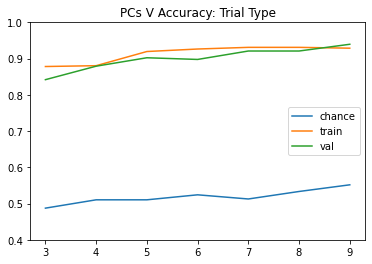

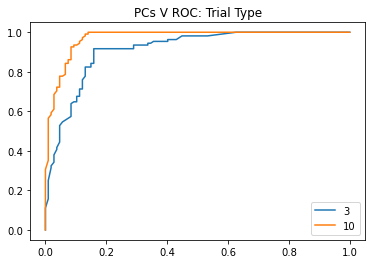

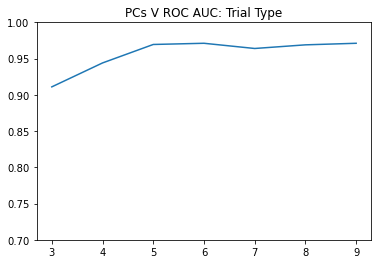

In [75]:
plotPCAROC(data, 'Trial Type', maximum)

Num PCs: 3
train acc: 0.7208695652173913, val acc: 0.6521739130434783, roc_auc: 0.7313456632653061
Num PCs: 4
train acc: 0.7478260869565216, val acc: 0.6616600790513834, roc_auc: 0.7927295918367347
Num PCs: 5
train acc: 0.7833816425120773, val acc: 0.6968379446640316, roc_auc: 0.7911352040816326
Num PCs: 6
train acc: 0.7435748792270531, val acc: 0.741897233201581, roc_auc: 0.7975127551020407
Num PCs: 7
train acc: 0.7697584541062803, val acc: 0.7320158102766797, roc_auc: 0.7960778061224489
Num PCs: 8
train acc: 0.7652173913043478, val acc: 0.7320158102766797, roc_auc: 0.793686224489796
Num PCs: 9
train acc: 0.7742995169082125, val acc: 0.7241106719367588, roc_auc: 0.7909757653061225
Num PCs: 10
train acc: 0.7917874396135265, val acc: 0.7233201581027668, roc_auc: 0.7927295918367346
Num PCs: 11
train acc: 0.7741062801932367, val acc: 0.7691699604743083, roc_auc: 0.7912946428571428
Num PCs: 12
train acc: 0.7608695652173914, val acc: 0.7778656126482214, roc_auc: 0.8177614795918369
Num PCs: 

train acc: 0.7343961352657005, val acc: 0.6980237154150197, roc_auc: 0.7850765306122449
Num PCs: 87
train acc: 0.7432850241545894, val acc: 0.7237154150197628, roc_auc: 0.7893813775510206
Num PCs: 88
train acc: 0.7431884057971014, val acc: 0.7138339920948618, roc_auc: 0.8145727040816327
Num PCs: 89
train acc: 0.7385507246376811, val acc: 0.7146245059288537, roc_auc: 0.7967155612244897
Num PCs: 90
train acc: 0.7298550724637681, val acc: 0.6699604743083003, roc_auc: 0.8045280612244897
Num PCs: 91
train acc: 0.7431884057971014, val acc: 0.6699604743083004, roc_auc: 0.7959183673469387
Num PCs: 92
train acc: 0.7388405797101449, val acc: 0.6873517786561264, roc_auc: 0.8102678571428571
Num PCs: 93
train acc: 0.7342995169082126, val acc: 0.6972332015810278, roc_auc: 0.7802933673469388
Num PCs: 94
train acc: 0.7164251207729468, val acc: 0.6604743083003952, roc_auc: 0.7933673469387755
Num PCs: 95
train acc: 0.7343961352657006, val acc: 0.6616600790513834, roc_auc: 0.7863520408163266
Num PCs: 96


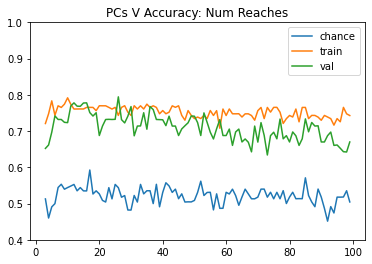

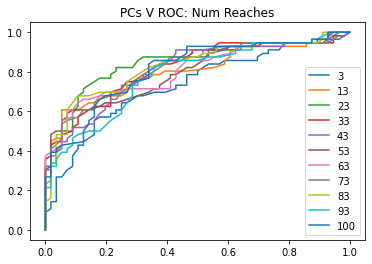

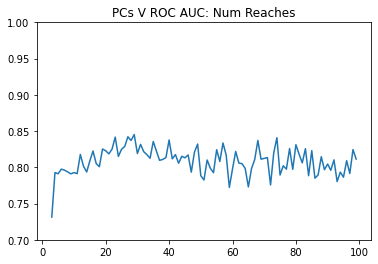

In [53]:
plotPCAROC(notNull_data, 'Num Reaches', maximum)

Num PCs: 3
train acc: 0.8537878787878789, val acc: 0.8654411764705883, roc_auc: 0.923076923076923
Num PCs: 4
train acc: 0.877840909090909, val acc: 0.8779411764705882, roc_auc: 0.9472271914132379
Num PCs: 5
train acc: 0.8475378787878789, val acc: 0.8411764705882353, roc_auc: 0.9358974358974359
Num PCs: 6
train acc: 0.8475378787878789, val acc: 0.8286764705882353, roc_auc: 0.9525939177101967
Num PCs: 7
train acc: 0.859659090909091, val acc: 0.8279411764705882, roc_auc: 0.9710793082886107
Num PCs: 8
train acc: 0.865909090909091, val acc: 0.8779411764705882, roc_auc: 0.9692903995229576
Num PCs: 9
train acc: 0.8477272727272727, val acc: 0.8772058823529412, roc_auc: 0.9645199761478831
Num PCs: 10
train acc: 0.865909090909091, val acc: 0.8897058823529411, roc_auc: 0.9743589743589743
Num PCs: 11
train acc: 0.8719696969696968, val acc: 0.8647058823529411, roc_auc: 0.975551580202743
Num PCs: 12
train acc: 0.8596590909090909, val acc: 0.8647058823529411, roc_auc: 0.9707811568276684
Num PCs: 13
t

train acc: 0.9022727272727273, val acc: 0.7808823529411765, roc_auc: 0.9788312462731067
Num PCs: 87
train acc: 0.9204545454545455, val acc: 0.7801470588235294, roc_auc: 0.9821109123434705
Num PCs: 88
train acc: 0.8901515151515152, val acc: 0.8286764705882353, roc_auc: 0.9809183064997018
Num PCs: 89
train acc: 0.9022727272727273, val acc: 0.7926470588235295, roc_auc: 0.9818127608825283
Num PCs: 90
train acc: 0.8901515151515152, val acc: 0.7926470588235295, roc_auc: 0.9800238521168754
Num PCs: 91
train acc: 0.9081439393939394, val acc: 0.8051470588235293, roc_auc: 0.9868813357185451
Num PCs: 92
train acc: 0.9022727272727273, val acc: 0.7801470588235294, roc_auc: 0.9838998211091234
Num PCs: 93
train acc: 0.9022727272727273, val acc: 0.7933823529411764, roc_auc: 0.9907573047107932
Num PCs: 94
train acc: 0.8962121212121212, val acc: 0.8176470588235294, roc_auc: 0.986881335718545
Num PCs: 95
train acc: 0.9022727272727273, val acc: 0.8176470588235294, roc_auc: 0.9806201550387597
Num PCs: 96
t

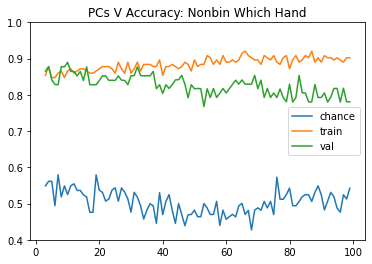

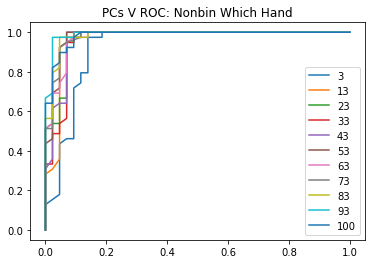

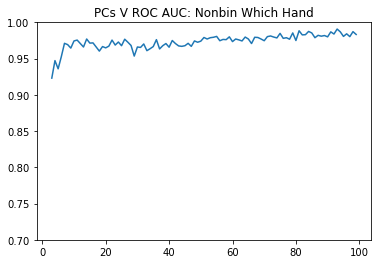

In [54]:
plotPCAROC(singleReach_data2, 'Nonbin Which Hand', maximum)

# do the same for extended

Num PCs: 3
train acc: 0.871264367816092, val acc: 0.874418604651163, roc_auc: 0.9509778470058845
Num PCs: 4
train acc: 0.8988505747126435, val acc: 0.9209302325581395, roc_auc: 0.975207684319834
Num PCs: 5
train acc: 0.9011494252873563, val acc: 0.9069767441860466, roc_auc: 0.9685877466251297
Num PCs: 6
train acc: 0.9172413793103449, val acc: 0.9162790697674419, roc_auc: 0.9770681896850122
Num PCs: 7
train acc: 0.9149425287356321, val acc: 0.930232558139535, roc_auc: 0.9711405330564209
Num PCs: 8
train acc: 0.9011494252873563, val acc: 0.9348837209302326, roc_auc: 0.9704049844236761
Num PCs: 9
train acc: 0.9057471264367816, val acc: 0.9116279069767442, roc_auc: 0.9723087573554864
Num PCs: 10
train acc: 0.903448275862069, val acc: 0.9069767441860466, roc_auc: 0.9764624437521634
Num PCs: 11
train acc: 0.9080459770114944, val acc: 0.9162790697674419, roc_auc: 0.9740827275874004
Num PCs: 12
train acc: 0.9103448275862067, val acc: 0.9116279069767442, roc_auc: 0.9758566978193146
Num PCs: 13


train acc: 0.9011494252873561, val acc: 0.8883720930232558, roc_auc: 0.9746019383869852
Num PCs: 87
train acc: 0.8988505747126435, val acc: 0.8976744186046511, roc_auc: 0.9701453790238836
Num PCs: 88
train acc: 0.903448275862069, val acc: 0.9023255813953488, roc_auc: 0.9695396330910351
Num PCs: 89
train acc: 0.9057471264367816, val acc: 0.8837209302325583, roc_auc: 0.9702751817237798
Num PCs: 90
train acc: 0.903448275862069, val acc: 0.9023255813953488, roc_auc: 0.9705780546902042
Num PCs: 91
train acc: 0.9172413793103449, val acc: 0.8930232558139535, roc_auc: 0.9672464520595362
Num PCs: 92
train acc: 0.9011494252873564, val acc: 0.8883720930232559, roc_auc: 0.9694963655244029
Num PCs: 93
train acc: 0.9057471264367816, val acc: 0.8883720930232559, roc_auc: 0.9689338871581862
Num PCs: 94
train acc: 0.9172413793103449, val acc: 0.8790697674418604, roc_auc: 0.9704915195569401
Num PCs: 95
train acc: 0.9080459770114944, val acc: 0.8976744186046511, roc_auc: 0.9694530979577709
Num PCs: 96
tr

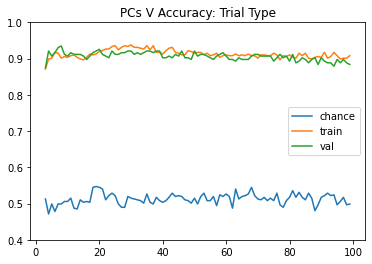

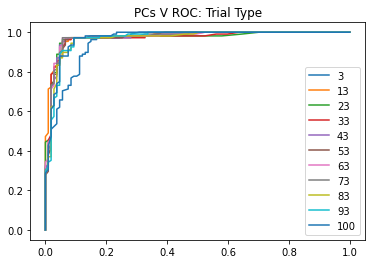

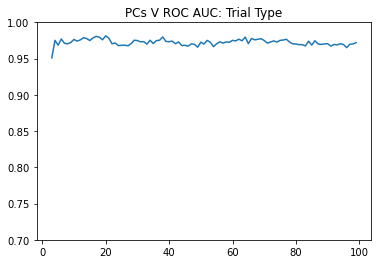

In [55]:
plotPCAROC(data_extended, 'Trial Type', maximum)

Num PCs: 3
train acc: 0.7254106280193237, val acc: 0.7225296442687748, roc_auc: 0.7012117346938775
Num PCs: 4
train acc: 0.738743961352657, val acc: 0.749802371541502, roc_auc: 0.7712053571428572
Num PCs: 5
train acc: 0.7830917874396135, val acc: 0.7940711462450591, roc_auc: 0.7815688775510204
Num PCs: 6
train acc: 0.7829951690821255, val acc: 0.74901185770751, roc_auc: 0.7971938775510203
Num PCs: 7
train acc: 0.7652173913043478, val acc: 0.8126482213438735, roc_auc: 0.7857142857142857
Num PCs: 8
train acc: 0.7786473429951691, val acc: 0.7932806324110672, roc_auc: 0.8139349489795918
Num PCs: 9
train acc: 0.7742995169082126, val acc: 0.8027667984189725, roc_auc: 0.8030931122448979
Num PCs: 10
train acc: 0.7786473429951691, val acc: 0.7312252964426877, roc_auc: 0.8125
Num PCs: 11
train acc: 0.7697584541062802, val acc: 0.7754940711462449, roc_auc: 0.8081951530612245
Num PCs: 12
train acc: 0.7742028985507247, val acc: 0.7573122529644267, roc_auc: 0.8094706632653061
Num PCs: 13
train acc: 

train acc: 0.7655072463768116, val acc: 0.7225296442687746, roc_auc: 0.7731186224489796
Num PCs: 87
train acc: 0.7567149758454106, val acc: 0.6774703557312252, roc_auc: 0.751594387755102
Num PCs: 88
train acc: 0.7478260869565216, val acc: 0.7395256916996047, roc_auc: 0.7638711734693878
Num PCs: 89
train acc: 0.7432850241545894, val acc: 0.7043478260869565, roc_auc: 0.7499999999999999
Num PCs: 90
train acc: 0.7433816425120774, val acc: 0.7043478260869565, roc_auc: 0.7657844387755103
Num PCs: 91
train acc: 0.7567149758454106, val acc: 0.6944664031620553, roc_auc: 0.7433035714285714
Num PCs: 92
train acc: 0.7566183574879227, val acc: 0.6505928853754941, roc_auc: 0.7810905612244898
Num PCs: 93
train acc: 0.7433816425120773, val acc: 0.7039525691699605, roc_auc: 0.7278380102040816
Num PCs: 94
train acc: 0.7478260869565216, val acc: 0.6600790513833992, roc_auc: 0.7632334183673468
Num PCs: 95
train acc: 0.7743961352657005, val acc: 0.7142292490118578, roc_auc: 0.7579719387755102
Num PCs: 96
t

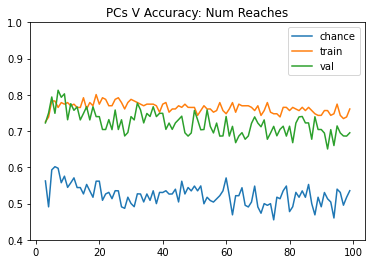

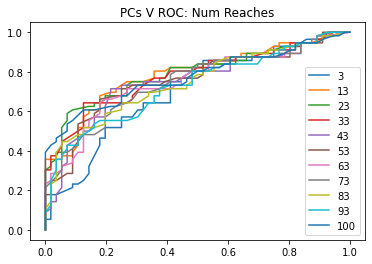

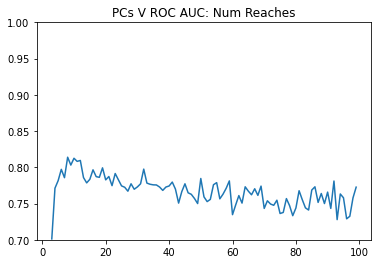

In [56]:
plotPCAROC(notNull_data_extended, 'Num Reaches', maximum)


Num PCs: 3
train acc: 0.7445075757575758, val acc: 0.6955882352941176, roc_auc: 0.8810375670840788
Num PCs: 4
train acc: 0.7986742424242425, val acc: 0.8058823529411765, roc_auc: 0.9514013118664282
Num PCs: 5
train acc: 0.8229166666666667, val acc: 0.8058823529411765, roc_auc: 0.9612403100775194
Num PCs: 6
train acc: 0.8348484848484847, val acc: 0.8198529411764707, roc_auc: 0.9645199761478832
Num PCs: 7
train acc: 0.853409090909091, val acc: 0.8308823529411764, roc_auc: 0.969886702444842
Num PCs: 8
train acc: 0.847159090909091, val acc: 0.8536764705882354, roc_auc: 0.97376267143709
Num PCs: 9
train acc: 0.8229166666666667, val acc: 0.8529411764705882, roc_auc: 0.9657125819916518
Num PCs: 10
train acc: 0.8475378787878789, val acc: 0.8411764705882353, roc_auc: 0.968097793679189
Num PCs: 11
train acc: 0.8598484848484848, val acc: 0.8536764705882354, roc_auc: 0.9761478831246273
Num PCs: 12
train acc: 0.847159090909091, val acc: 0.8536764705882354, roc_auc: 0.9752534287418009
Num PCs: 13
tr

train acc: 0.8840909090909091, val acc: 0.7926470588235295, roc_auc: 0.9827072152653548
Num PCs: 87
train acc: 0.890340909090909, val acc: 0.7926470588235295, roc_auc: 0.9764460345855696
Num PCs: 88
train acc: 0.8660984848484847, val acc: 0.7683823529411764, roc_auc: 0.9791293977340488
Num PCs: 89
train acc: 0.884090909090909, val acc: 0.7926470588235295, roc_auc: 0.9809183064997019
Num PCs: 90
train acc: 0.9087121212121213, val acc: 0.7933823529411764, roc_auc: 0.9821109123434705
Num PCs: 91
train acc: 0.8905303030303031, val acc: 0.7919117647058823, roc_auc: 0.9788312462731067
Num PCs: 92
train acc: 0.8964015151515152, val acc: 0.7926470588235295, roc_auc: 0.9821109123434705
Num PCs: 93
train acc: 0.8964015151515152, val acc: 0.7919117647058823, roc_auc: 0.9797257006559332
Num PCs: 94
train acc: 0.8842803030303031, val acc: 0.7919117647058823, roc_auc: 0.9800238521168754
Num PCs: 95
train acc: 0.8842803030303031, val acc: 0.7926470588235295, roc_auc: 0.9821109123434705
Num PCs: 96
tr

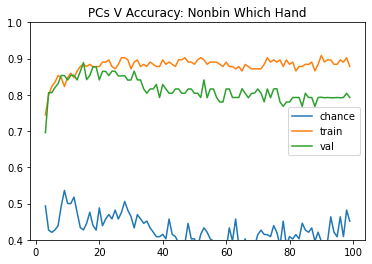

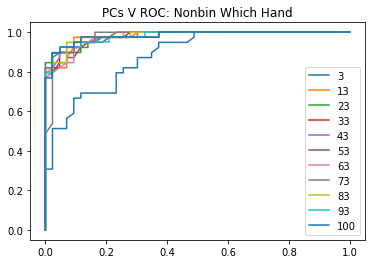

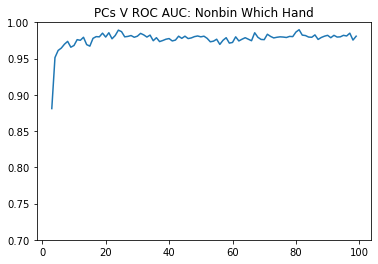

In [57]:
plotPCAROC(singleReach_data2_extended, 'Nonbin Which Hand', maximum)

# DO FULL CLASSIFICATION

0.0    325
1.0    325
Name: Trial Type, dtype: int64


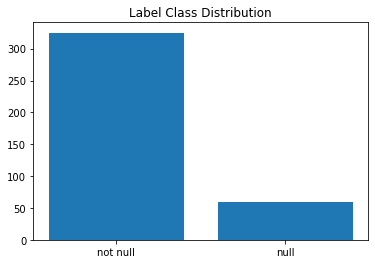

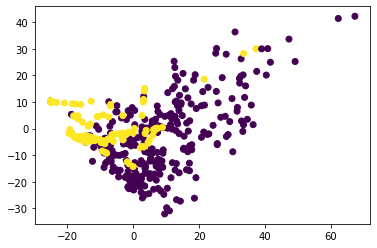

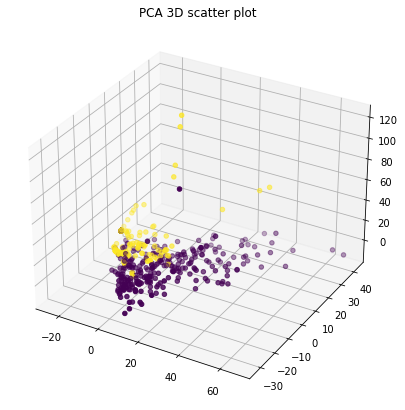

Avg cv accuracy: 0.522
Avg cv accuracy: 0.924
Avg cv accuracy: 0.916


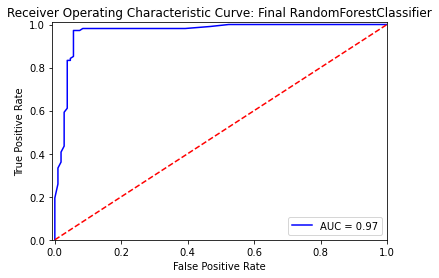

In [81]:
# null v not null
null_classifier = classifier(data, 'Trial Type')
convert_dict = { 0:"not null", 1:"null"}
null_classifier.main(convert_dict, sn_k=False)

0.0    169
1.0    169
Name: Num Reaches, dtype: int64


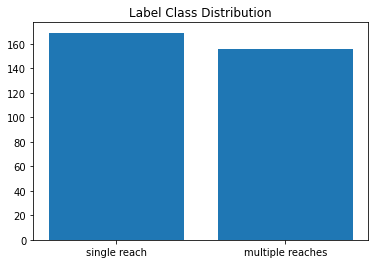

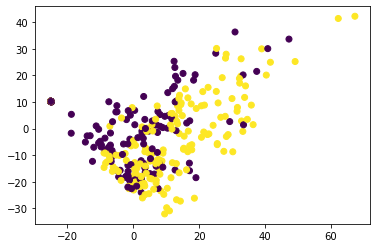

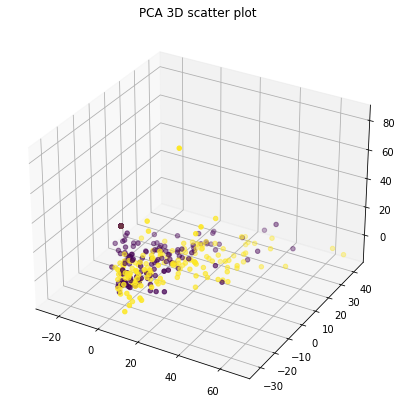

Avg cv accuracy: 0.549
Avg cv accuracy: 0.708
Avg cv accuracy: 0.58


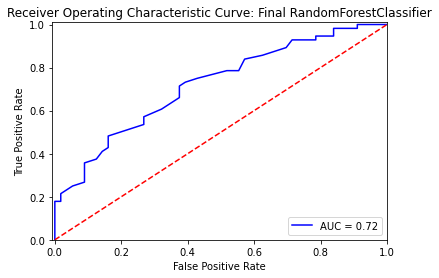

In [84]:
# single v multiple
reaches_classifier = classifier(notNull_data, 'Num Reaches')
convert_dict = { 0:"single reach", 1:"multiple reaches"}
reaches_classifier.main(convert_dict, sn_k=False)

0.0    123
1.0    123
Name: Nonbin Which Hand, dtype: int64


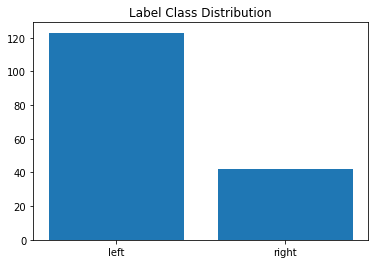

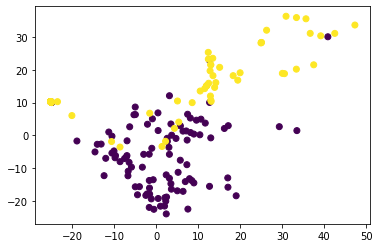

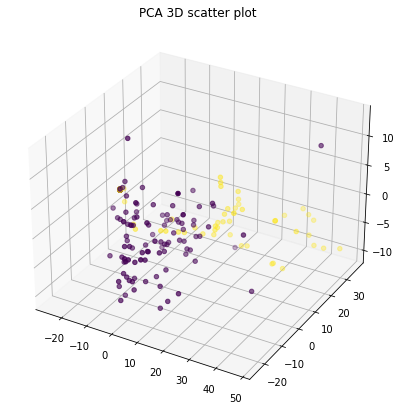

Avg cv accuracy: 0.494
Avg cv accuracy: 0.89
Avg cv accuracy: 0.805


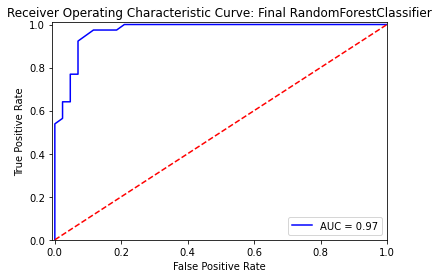

In [83]:
# l v r
reaches_classifier = classifier(singleReach_data2, 'Nonbin Which Hand')
convert_dict = { 0:"left hand", 1:"right hand"}
reaches_classifier.main(convert_dict, sn_k=False)

# Compare MODELS

In [102]:
def plotModelsvAcc(data, y_name, models):
    # define data holding lists
    all_chance = []
    all_trainAcc = []
    all_valAcc = []
    all_ROC = []
    all_ROCAUC = []
    names = []

    # for each # of PCs 1, 2...n to use
    for modelInfo in models:
        model1, model2, name = modelInfo
        classifier(data, 'Trial Type').main_PCvROC(model1, model2)

        # do classification
        chance_score, train_score, val_score, roc, roc_auc = classifier(data, y_name).main_PCvROC(model1, model2)
        all_chance.append(chance_score)
        all_trainAcc.append(train_score)
        all_valAcc.append(val_score)
        all_ROC.append(roc)
        all_ROCAUC.append(roc_auc)
        names.append(name)

    # plot
    fig = plt.figure()
    #plt.ylim([0.4, 1.0]) # y axis range fixed to be 0.40 to 1.00
    plt.title(f"Models V Accuracy: {y_name}")
    x_axis = np.arange(len(models))
    width = 0.2
    plt.bar(x_axis+width, all_chance, width, label="chance")
    plt.bar(x_axis+width*2, all_trainAcc, width, label="train")
    plt.bar(x_axis+width*3,  all_valAcc, width, label="val")
    plt.bar(x_axis+width*4,  all_ROCAUC, width, label="roc auc")
    plt.xticks(x_axis+width, names)
    plt.legend()
    plt.savefig(f"Plots/ModelsvAcc: {y_name}")

    fig = plt.figure()
    plt.title(f"Models V ROC: {y_name}")
    for i in range(0, len(models)):
        fpr, tpr = all_ROC[i]
        plt.plot(fpr, tpr, label=names[i])
    plt.legend()
    plt.savefig(f"Plots/ModelsvROC: {y_name}")

    #fig = plt.figure()
    #plt.ylim([0.7, 1.0]) # y axis range to be 0.70-1.00
    #plt.title(f"PModels V ROC AUC: {y_name}")
    #plt.plot(NumPCsArray, all_ROCAUC)
    #plt.savefig(f"Plots/ModelsvROCAUC: {y_name}")

In [125]:
models = [
    [RandomForestClassifier(n_estimators=150), RandomForestClassifier(n_estimators=150), "RaForest"],
    [LogisticRegression(), LogisticRegression(), "LogRegr"],
    [SVC(kernel='linear', probability=True), SVC(kernel='linear', probability=True), "SVM"],
    [LDA(), LDA(), "LDA"],
    [neighbors.KNeighborsClassifier(n_neighbors=5),  neighbors.KNeighborsClassifier(n_neighbors=5), "KNN"],
    [AdaBoostClassifier(n_estimators=100, random_state=0), AdaBoostClassifier(n_estimators=100, random_state=0), "AdaBoost"]
    
]

train acc: 0.9034482758620689, val acc: 0.855813953488372, roc_auc: 0.9614053305642091
train acc: 0.8965517241379312, val acc: 0.8604651162790697, roc_auc: 0.9577708549671167
train acc: 0.9701149425287356, val acc: 0.9023255813953488, roc_auc: 0.9796642436829353
train acc: 0.9701149425287356, val acc: 0.9023255813953488, roc_auc: 0.9796642436829353
train acc: 0.9908045977011494, val acc: 0.9348837209302324, roc_auc: 0.9792315680166147
train acc: 0.9908045977011494, val acc: 0.9348837209302324, roc_auc: 0.9792315680166147
train acc: 0.9977011494252874, val acc: 0.8883720930232558, roc_auc: 0.9685012114918656
train acc: 0.9977011494252874, val acc: 0.8883720930232558, roc_auc: 0.9685012114918656
train acc: 0.8965517241379309, val acc: 0.9069767441860466, roc_auc: 0.9566458982346833
train acc: 0.8965517241379309, val acc: 0.9069767441860466, roc_auc: 0.9566458982346833
train acc: 0.9356321839080459, val acc: 0.9441860465116279, roc_auc: 0.9848563516787816
train acc: 0.9356321839080459, va

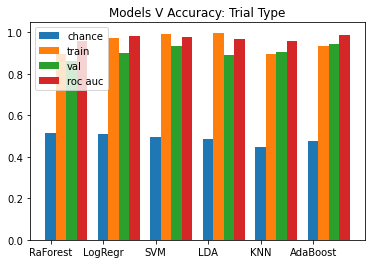

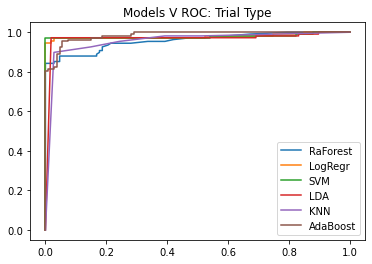

In [126]:
plotModelsvAcc(data, 'Trial Type', models)

# LDA

In [65]:
# TODO

# DEBUGGING BELOW

# Classification Broken Down (TRIAL TYPE)

In [452]:
# define classification

def filter_y(df, y_name):
    new_df = df.copy()
    for col in new_df.columns:
        if (not "PC" in col) and (col!=y_name):
            new_df= new_df.drop([col], axis=1)
    X = new_df.drop([y_name], axis=1)
    y = new_df[y_name]#.to_frame()
    return new_df, X, y

n_data, n_X, n_y = filter_y(data, 'Trial Type')
n_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,Trial Type
0,-14.578559,-5.041855,-0.595268,-2.936764,-8.390312,7.490844,6.429889,-7.204945,-0.299799,2.578511,...,0.276066,2.178064,-0.383316,-0.287861,-0.083923,0.461817,0.544128,-1.121295,-0.686357,0.0
1,4.716551,-0.941516,-1.802206,-7.256358,-1.455922,9.156361,1.579537,-8.533399,-1.667845,9.405195,...,-0.097083,-0.734831,-0.371395,-0.483707,-2.228044,-0.654182,-1.417482,-0.177132,0.212455,0.0
2,0.427181,6.857999,-2.140233,-8.167299,0.929359,0.864605,5.821072,2.325451,3.455134,-3.617788,...,-0.334287,-1.000811,-0.606622,0.699076,0.126840,0.116297,0.607876,-0.862649,-0.119978,0.0
3,-7.513167,-7.081834,-0.431055,-0.629572,-2.676139,4.936948,12.582419,-4.476204,-1.476270,-2.904616,...,-0.877859,-0.228536,1.187996,-0.429088,1.327273,-0.747723,-0.582234,-0.816358,-0.037309,0.0
4,-8.309514,-9.211085,-1.785262,1.032228,-4.581666,5.661317,5.681253,-4.748942,-0.726019,0.850819,...,0.949232,0.405132,-0.265936,0.109882,-0.597940,0.607146,-0.030240,-0.909176,-0.097356,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,-24.880454,10.076714,-0.891552,-0.484258,3.244830,-2.921296,-1.986072,0.335566,-0.144068,0.783222,...,0.086938,-0.259906,0.112307,0.302925,-0.248065,-0.007695,-0.195415,0.206245,0.183072,1.0
380,-24.914528,10.122275,-0.918055,-0.502231,3.247931,-2.953253,-1.985275,0.324028,-0.091390,0.798398,...,-0.213204,-0.437290,0.149568,0.334334,-0.484839,0.012625,-0.250890,0.271147,0.140325,1.0
381,-25.035004,10.256905,-1.045083,-0.605819,3.279838,-3.066576,-2.060773,0.395950,0.125602,1.019092,...,0.054444,-0.305129,0.083155,0.318778,-0.429143,0.069952,-0.151667,0.290886,0.145134,0.0
382,-24.946927,10.232005,-0.963113,-0.503517,3.300784,-3.074417,-1.823509,0.169133,0.090363,0.773472,...,0.196385,-0.159428,0.054962,0.093607,-0.221421,0.151379,0.281103,0.294025,-0.287824,1.0


In [453]:
# todo normalize / standardize 

# Apply SMOTE to Null Trials

In [454]:
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

def adjust_class_imbalance(X, y):
    """
    Adjusts for class imbalance.
        Object to over-sample the minority class(es) by picking samples at random with replacement.
        The dataset is transformed, first by oversampling the minority class, then undersampling the majority class.
    Returns: new samples
    References: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
    """
    oversampler = SMOTE(random_state=42)
    #undersampler = RandomUnderSampler(random_state=42)
    steps = [('o', oversampler)] #, ('u', undersampler)]
    pipeline = Pipeline(steps=steps)
    X_res, y_res = pipeline.fit_resample(X, y)
    return X_res, y_res

def plot_scatter(X, y):
    """
    Return Scatter Plot
    X: Df
    y: Series
    """
    # summarize class distribution
    counter = y.value_counts()
    print(counter)

    # scatter plot of examples by class label
    plt.figure()
    plt.scatter(X["PC1"].values, X["PC2"].values, c=y.values)
    plt.show()

0.0    325
1.0     59
Name: Trial Type, dtype: int64


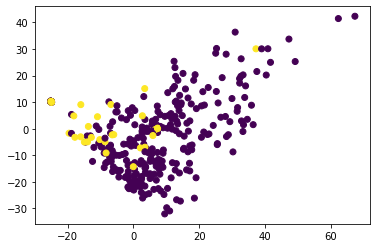

In [455]:
plot_scatter(n_X, n_y)

0.0    325
1.0    325
Name: Trial Type, dtype: int64


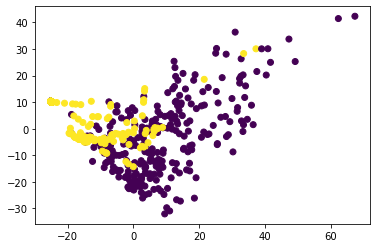

In [456]:

sn_X, sn_y = adjust_class_imbalance(n_X, n_y)
plot_scatter(sn_X, sn_y)

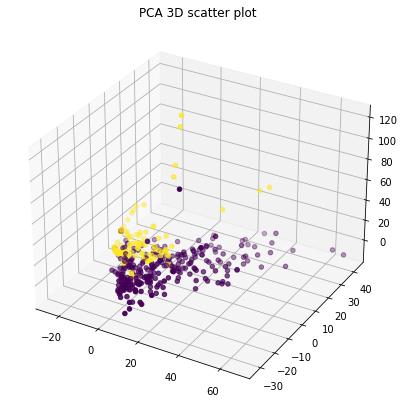

In [457]:
def plot_scatter_3D(X, y):
    """
    Return Scatter Plot
    X: Df
    y: Series
    """
    a = X["PC1"].values
    b = X["PC2"].values
    c = X["PC3"].values
    
    # Creating figure
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")

    # Creating plot
    ax.scatter3D(a, b, c, c=y.values)
    plt.title("PCA 3D scatter plot")

    # show plot
    plt.show()
    
plot_scatter_3D(sn_X, sn_y)

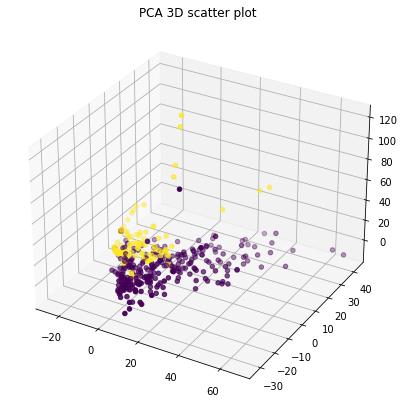

In [458]:
plot_scatter_3D(sn_X, sn_y)

In [459]:
def plot_class_balance(y, convert_dict):
    counts = y.replace(convert_dict).value_counts()
    x_labels = list(convert_dict.values())
    plt.figure()
    plt.bar(x_labels, counts.values)
    plt.title("Label Class Distribution");


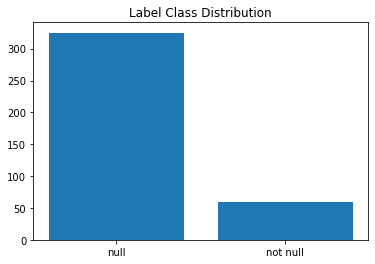

In [460]:
convert_dict = {1:"null", 0:"not null"}
plot_class_balance(n_y, convert_dict)

# Classify Null v Not Null

## Create 1/3 holdout set

In [461]:
def split(X, Y):
    # Split into training+validation and test set (33%)
    X_temp, X_test, Y_temp, Y_test = train_test_split(X, Y, test_size = 0.33, random_state=10) 

    # Split into training and validation set (33%)
    X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size = 0.33, random_state=10) 

    print(f" X_train size {X_train.shape} \n X_val size {X_val.shape}\n X_test size {X_test.shape}.")
    return X_train, X_val, Y_train, Y_val, X_test, Y_test


In [462]:
sn_X_train, sn_X_val, sn_Y_train, sn_Y_val, sn_X_test, sn_Y_test = split(sn_X, sn_y)

 X_train size (291, 100) 
 X_val size (144, 100)
 X_test size (215, 100).


## Determine Chance

In [463]:
def find_chance(y):
    y = y.copy()
    y = shuffle(y, random_state=42)
    return y.reset_index(drop=True)

In [464]:
shuffled_sn_y_train = find_chance(sn_Y_train)
shuffled_sn_y_train

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
286    0.0
287    1.0
288    1.0
289    0.0
290    1.0
Name: Trial Type, Length: 291, dtype: float64

In [465]:
#For reproducibility 
#all models
random_state = 10

# Initial Accuracies

In [466]:
def initial_accuracy(X_train, Y_train):
    # Initial Accuracy
    model = RandomForestClassifier(random_state=random_state)
    model.fit(X_train, np.ravel(Y_train))
    score = np.mean(cross_val_score(model, X_train, np.ravel(Y_train), scoring='accuracy', cv=5)) 
    print(f"Initial avg cv accuracy: {np.round(score, 3)}")
    
    # metrics.f1_score(np.ravel(Y_val), model.predict(X_val)) 

In [467]:
# No tuning
initial_accuracy(sn_X_train, sn_Y_train)

Initial avg cv accuracy: 0.918


In [468]:
# Chance
initial_accuracy(sn_X_train, shuffled_sn_y_train)

Initial avg cv accuracy: 0.532


## Hypterparameter Tuning

In [469]:
# N_estimators # Fixed at 150
def tune_hyperparams(X_train, Y_train):
    # Tuning hyperparameters for RandomForestClassifier
    # may take a bit to run
    # reference https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

    # creat model
    model = RandomForestClassifier(random_state=random_state) 

    # define hyperparameter to tune
    n_estimators = [10, 50, 100, 200, 600, 800, 1000]  # make smaller to reduce runtime if necessary

    # define cross validation grid search
    grid = dict(n_estimators=n_estimators)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X_train, np.ravel(Y_train))

    # summarize results
    print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    params = grid_result.cv_results_['params']

    # plot
    plt.plot([p['n_estimators'] for p in params], means,marker='o', color='orange')
    plt.title("Random Forest Classifier: # Trees in Forest vs Accuracy")
    plt.xlabel("n_estimators (The number of trees in the forest)")
    plt.ylabel("CV Accuracy");

    # define best n_estimators
    n_estimators = grid_result.best_params_['n_estimators']
    return n_estimators


In [470]:
sn_n_estimators = 150 #tune_hyperparams(sn_X_train, sn_Y_train)
sn_n_estimators

150

In [471]:
# Depth of trees
def tune_hyperparams(X_train, Y_train):
    # Tuning hyperparameters for RandomForestClassifier
    # may take a bit to run
    # reference https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

    # creat model
    model = RandomForestClassifier(random_state=random_state) 

    # define hyperparameter to tune
    max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]  # make smaller to reduce runtime if necessary

    # define cross validation grid search
    grid = dict(max_depth=max_depth)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X_train, np.ravel(Y_train))

    # summarize results
    print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    params = grid_result.cv_results_['params']

    # plot
    plt.plot([p['max_depth'] for p in params], means,marker='o', color='orange')
    plt.title("Random Forest Classifier: Max Depth of Trees vs Accuracy")
    plt.xlabel("n_estimators (Max Depth of Trees)")
    plt.ylabel("CV Accuracy");

    # define best n_estimators
    best_max_depth = grid_result.best_params_['max_depth']
    return best_max_depth

In [472]:
sn_max_depth = None#tune_hyperparams(sn_X_train, sn_Y_train)
sn_max_depth

## Visualize Feature Importances

In [473]:
def vis_feat_importance(X_train, Y_train):
    # Visualize best features
    selector = SelectKBest(score_func=f_classif, k=3)  # f_classif: ANOVA F-value between label/feature for classification tasks.
    z = selector.fit_transform(X_train, np.ravel(Y_train))  # temp new X and k
    filter = selector.get_support() # mask for selected features
    features = np.array(X_train.columns) # all feature names 

    # create series for plotting
    forest_importances = pd.Series(selector.scores_, index=features)

    # sort in descending order
    forest_importances = forest_importances.sort_values(ascending=False)

    # print top 3 features
    print(f"3 Most Important Features: {features[filter]}")

    # plot
    fig, ax = plt.subplots()
    forest_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances")
    ax.set_ylabel("ANOVA F-value (f_classif)")
    ax.set_xlabel("Features");


3 Most Important Features: ['PC1' 'PC2' 'PC7']


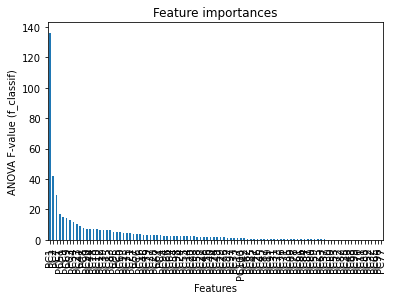

In [474]:
vis_feat_importance(sn_X_train, sn_Y_train)

In [475]:
def best_k_features(X_train, Y_train, n_estimators):
    # Visualize Accuracy vs Number of Features
    # may take a bit to run
    accuracies = []
    n = X_train.shape[1]+1 # num cols
    for k in np.arange(1, n): 
      selector = SelectKBest(score_func=f_classif, k=k)  # f_classif: ANOVA F-value between label/feature for classification tasks.
      z = selector.fit_transform(X_train, np.ravel(Y_train))  # temp new X
      filter = selector.get_support() # mask for selected features

      # create, fit, and score model on k features
      model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)  # use best n_estimators from previous part
      model.fit(z, np.ravel(Y_train))
      scores = cross_val_score(model, z, np.ravel(Y_train), cv=3) # 3-fold cv to reduce time to run
      accuracies.append(np.mean(scores))

    # print best k
    a_dictionary = dict(zip(np.arange(1, n), accuracies))
    max_key = max(a_dictionary, key=a_dictionary.get)
    print(f"max accuracy {max(accuracies)} with k={max_key}.")

    # plot
    plt.plot(np.arange(1, n), accuracies, marker='v', color='green')
    plt.title("Random Forest Classifier: Number of Features vs Accuracy")
    plt.xlabel("k (# of most important features used)")
    plt.ylabel("CV Accuracy");
    plt.xticks(np.arange(1, n));

    # define best k
    k = max_key
    return k


max accuracy 0.9381443298969073 with k=19.


19

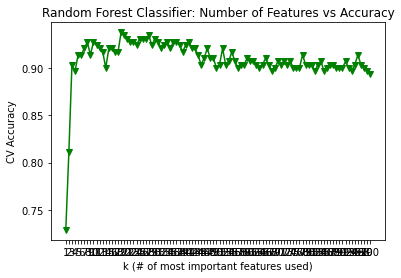

In [476]:
sn_k = best_k_features(sn_X_train, sn_Y_train, sn_n_estimators)
sn_k

In [477]:
# Using best hyperparams

# create, fit, and score model on training data
#selector = SelectKBest(score_func=f_classif, k=sn_k)  # f_classif: ANOVA F-value between label/feature for classification tasks.
#z = selector.fit_transform(sn_X_train, np.ravel(sn_Y_train))  # new X

#model = RandomForestClassifier(n_estimators=sn_n_estimators, random_state=random_state)
#model.fit(z, np.ravel(sn_Y_train))
#score = np.mean(cross_val_score(model, z, np.ravel(sn_Y_train), cv=5))
#print(f"Training avg cv training accuracy: After Tuning {np.round(score, 2)}")

selector = SelectKBest(score_func=f_classif, k=sn_k)  # f_classif: ANOVA F-value between label/feature for classification tasks.
z = selector.fit_transform(sn_X_val, np.ravel(sn_Y_val))  # new X
model = RandomForestClassifier(n_estimators=sn_n_estimators, max_depth=sn_max_depth, random_state=10)
classifier.score_model(z, sn_Y_val, model)

Avg cv accuracy: 0.868


In [482]:
def plot_ROC(X_test, Y_test):
    # ROC CURVE
    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(np.ravel(Y_test), preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    # plot ROC
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.title('Receiver Operating Characteristic Curve: Final RandomForestClassifier')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.008, 1])
    plt.ylim([0, 1.01]) # changed to better view curve at 1.0
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    return Y_test, preds

In [483]:
sn_Y_val.unique()

array([1., 0.])

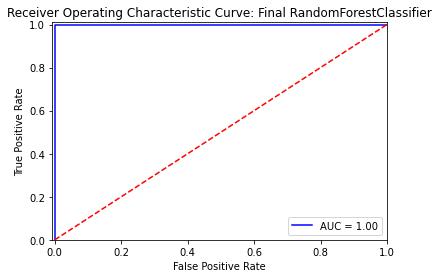

In [484]:
temp_X = selector.transform(sn_X_val)
Y_test, preds = plot_ROC(temp_X, sn_Y_val)

# BROKEN DOWN CLASSIFICATION (NUM REACHES)